In [3]:
# Import relevant module for analysis, manipulation and plotting
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as ss

In [4]:
# Read dataset into pandas dataframe
data_url = 'https://raw.githubusercontent.com/faadeola/gym-analysis/main/gym_members_exercise_tracking.csv'
df_gym = pd.read_csv(data_url)

# Display the first 5 row information in the dataframe
df_gym.head()

,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Workout_Type,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI
0,56,Male,88.3,1.71,180,157,60,1.69,1313.0,Yoga,12.6,3.5,4,3,30.20
1,46,Female,74.9,1.53,179,151,66,1.30,883.0,HIIT,33.9,2.1,4,2,32.00
2,32,Female,68.1,1.66,167,122,54,1.11,677.0,Cardio,33.4,2.3,4,2,24.71
3,25,Male,53.2,1.70,190,164,56,0.59,532.0,Strength,28.8,2.1,3,1,18.41
4,38,Male,46.1,1.79,188,158,68,0.64,556.0,Strength,29.2,2.8,3,1,14.39


In [5]:
''' 
Display information about the data:
columns, count of cell that are not empty (non-null) and the data type of each column
'''
df_gym.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 973 entries, 0 to 972
Data columns (total 15 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Age                            973 non-null    int64  
 1   Gender                         973 non-null    object 
 2   Weight (kg)                    973 non-null    float64
 3   Height (m)                     973 non-null    float64
 4   Max_BPM                        973 non-null    int64  
 5   Avg_BPM                        973 non-null    int64  
 6   Resting_BPM                    973 non-null    int64  
 7   Session_Duration (hours)       973 non-null    float64
 8   Calories_Burned                973 non-null    float64
 9   Workout_Type                   973 non-null    object 
 10  Fat_Percentage                 973 non-null    float64
 11  Water_Intake (liters)          973 non-null    float64
 12  Workout_Frequency (days/week)  973 non-null    int

In [6]:
# Display basic statistical information about the data
# Round outcomes to 2 decimal points
df_gym.describe().round(2)

,Age,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI
count,973.00,973.00,973.00,973.00,973.00,973.00,973.00,973.00,973.00,973.00,973.00,973.00,973.00
mean,38.68,73.85,1.72,179.88,143.77,62.22,1.26,905.42,24.98,2.63,3.32,1.81,24.91
std,12.18,21.21,0.13,11.53,14.35,7.33,0.34,272.64,6.26,0.60,0.91,0.74,6.66
min,18.00,40.00,1.50,160.00,120.00,50.00,0.50,303.00,10.00,1.50,2.00,1.00,12.32
25%,28.00,58.10,1.62,170.00,131.00,56.00,1.04,720.00,21.30,2.20,3.00,1.00,20.11
50%,40.00,70.00,1.71,180.00,143.00,62.00,1.26,893.00,26.20,2.60,3.00,2.00,24.16
75%,49.00,86.00,1.80,190.00,156.00,68.00,1.46,1076.00,29.30,3.10,4.00,2.00,28.56
max,59.00,129.90,2.00,199.00,169.00,74.00,2.00,1783.00,35.00,3.70,5.00,3.00,49.84


In [7]:
def plot_hist(col):
    '''
    Create an histogram plot for any specified column
    '''
    
    fig, ax = plt.subplots(dpi=144)

    # The kde (kernel density estimate) argument set to True shows shape of the distribution on the plot
    sns.histplot(col, bins=15, color='blue', edgecolor='black', kde=True)
    
    # Draw a vertical line on the mean and median point of the specified column
    plt.axvline(col.mean(), color='red', lw=1.5, ls='--', label= f'Mean: {col.mean():.2f}')
    plt.axvline(col.median(), color='orange', lw=1, ls='-', label= f'Median: {col.median():.2f}')
    #plt.text(1.56, 155, f'Skew value of \n{col.name}: \n{ss.skew(col):.2f}', fontsize=8)

    # Set plot attributes (label, title and ticks)
    plt.xlabel(col.name, labelpad=10, fontsize=12)
    plt.ylabel('Frequency of Occurrence', labelpad=10, fontsize=12)
    plt.title(f'Histogram of {col.name} Distribution', fontsize= 12, fontweight='bold', pad=14)
    ax.tick_params(axis='both', labelsize=8)

    # Print the skewness value of the histogram
    print(f'Skew value of {col.name}: {ss.skew(col):.2f}')
    
    plt.legend(loc='upper right')
    plt.show()
    return
    

Skew value of Weight (kg): 0.77


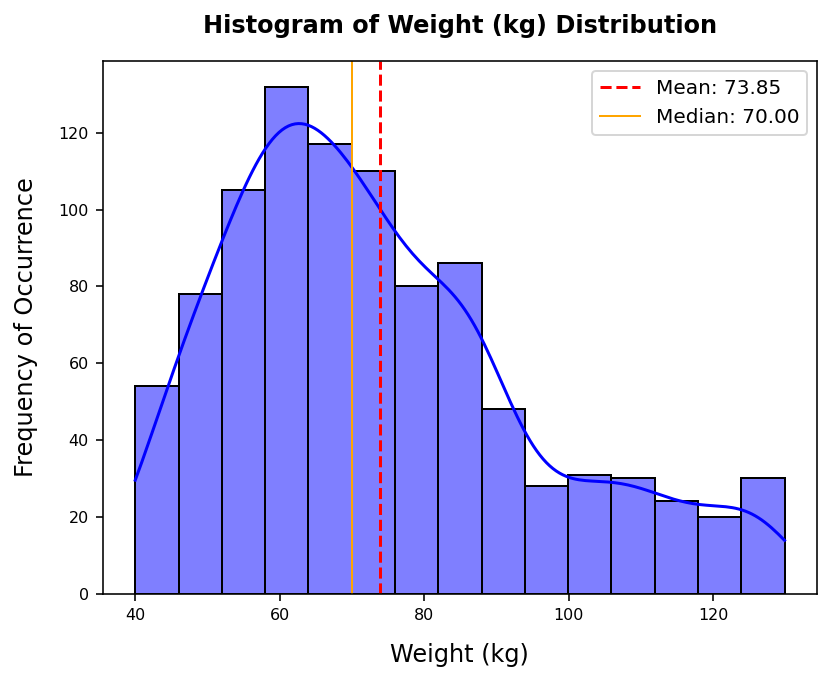

In [8]:
# Plot the histogram of the Weight to understand the distribution among gym members
plot_hist(df_gym['Weight (kg)'])

In [9]:
def plot_scatter(x_col,y_col):
    '''
    Create a scatter plot between two columns
    '''

    fig, ax = plt.subplots(dpi=144)
    plt.scatter(x_col,y_col, color='red', marker='o', alpha=0.4)

    # Set the plot attributes (labels, title and ticks)
    plt.xlabel(x_col.name, labelpad=10, fontsize=12)
    plt.ylabel(y_col.name, labelpad=10, fontsize=12)
    plt.title(f'Scatter plot of \n{x_col.name} vs {y_col.name}',fontsize=12, fontweight='bold', pad=14)
    ax.tick_params(axis='both', labelsize=8)

    plt.show()
    return

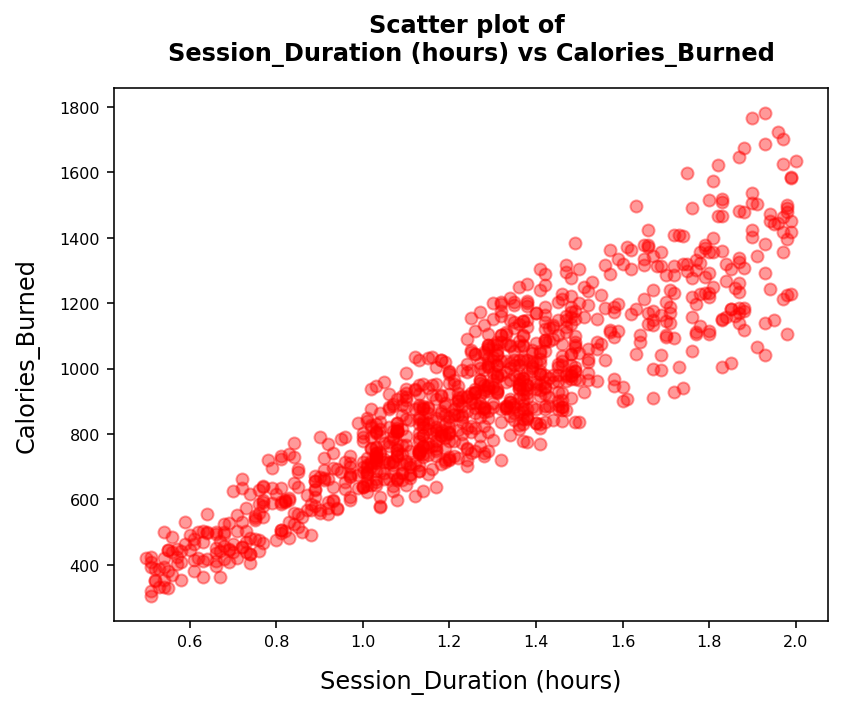

In [10]:
# Plot the scatter plot of Session Duration against Calories Burned
plot_scatter(df_gym['Session_Duration (hours)'],df_gym['Calories_Burned'])

In [11]:
# Get the correlation value for all numeric values in the Gym dataset using Pearson's method
df_gym_corr = df_gym.corr(method='pearson', numeric_only=True)

# Print out the correlation table
df_gym_corr

,Age,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI
Age,1.000000,-0.036340,-0.027837,-0.017073,0.035969,0.004354,-0.019912,-0.154679,0.002370,0.041528,0.008055,-0.018676,-0.013691
Weight (kg),-0.036340,1.000000,0.365321,0.057061,0.009717,-0.032138,-0.013666,0.095443,-0.225512,0.394276,-0.011769,0.003379,0.853158
Height (m),-0.027837,0.365321,1.000000,-0.017660,-0.014776,-0.005090,-0.010206,0.086348,-0.235521,0.393533,-0.011270,-0.010267,-0.159469
Max_BPM,-0.017073,0.057061,-0.017660,1.000000,-0.039751,0.036647,0.010051,0.002090,-0.009056,0.031621,-0.029099,0.000545,0.067105
Avg_BPM,0.035969,0.009717,-0.014776,-0.039751,1.000000,0.059636,0.016014,0.339659,-0.007302,-0.002911,-0.010681,-0.000888,0.021605
Resting_BPM,0.004354,-0.032138,-0.005090,0.036647,0.059636,1.000000,-0.016649,0.016518,-0.016834,0.007726,-0.007967,0.001758,-0.032543
Session_Duration (hours),-0.019912,-0.013666,-0.010206,0.010051,0.016014,-0.016649,1.000000,0.908140,-0.581520,0.283411,0.644140,0.764768,-0.006493
Calories_Burned,-0.154679,0.095443,0.086348,0.002090,0.339659,0.016518,0.908140,1.000000,-0.597615,0.356931,0.576150,0.694129,0.059761
Fat_Percentage,0.002370,-0.225512,-0.235521,-0.009056,-0.007302,-0.016834,-0.581520,-0.597615,1.000000,-0.588683,-0.537060,-0.654363,-0.119258
Water_Intake (liters),0.041528,0.394276,0.393533,0.031621,-0.002911,0.007726,0.283411,0.356931,-0.588683,1.000000,0.238563,0.304104,0.213697


In [12]:
def plot_corr_hmap(df_gym_corr):
    '''
    Plot the heatmap for the gym dataframe 
    using the Seaborn Library and Pearson's method
    '''
    
    # Set mask to hide the upper repetition of data in the heatmap
    hmask = np.triu(np.ones_like(df_gym_corr))

    # Plotting the heatmap
    plt.figure(figsize=(14,8),dpi=144)
    sns.heatmap(df_gym_corr, cmap='coolwarm', annot=True, lw=1.5, mask=hmask, vmin=-1, vmax=1)
    
    # Set plot attributes
    plt.title('Heatmap of the Gym Dataset', fontsize=12, fontweight='bold', pad=14)
    plt.tick_params(axis='both', labelsize=12)

    plt.show()
    return

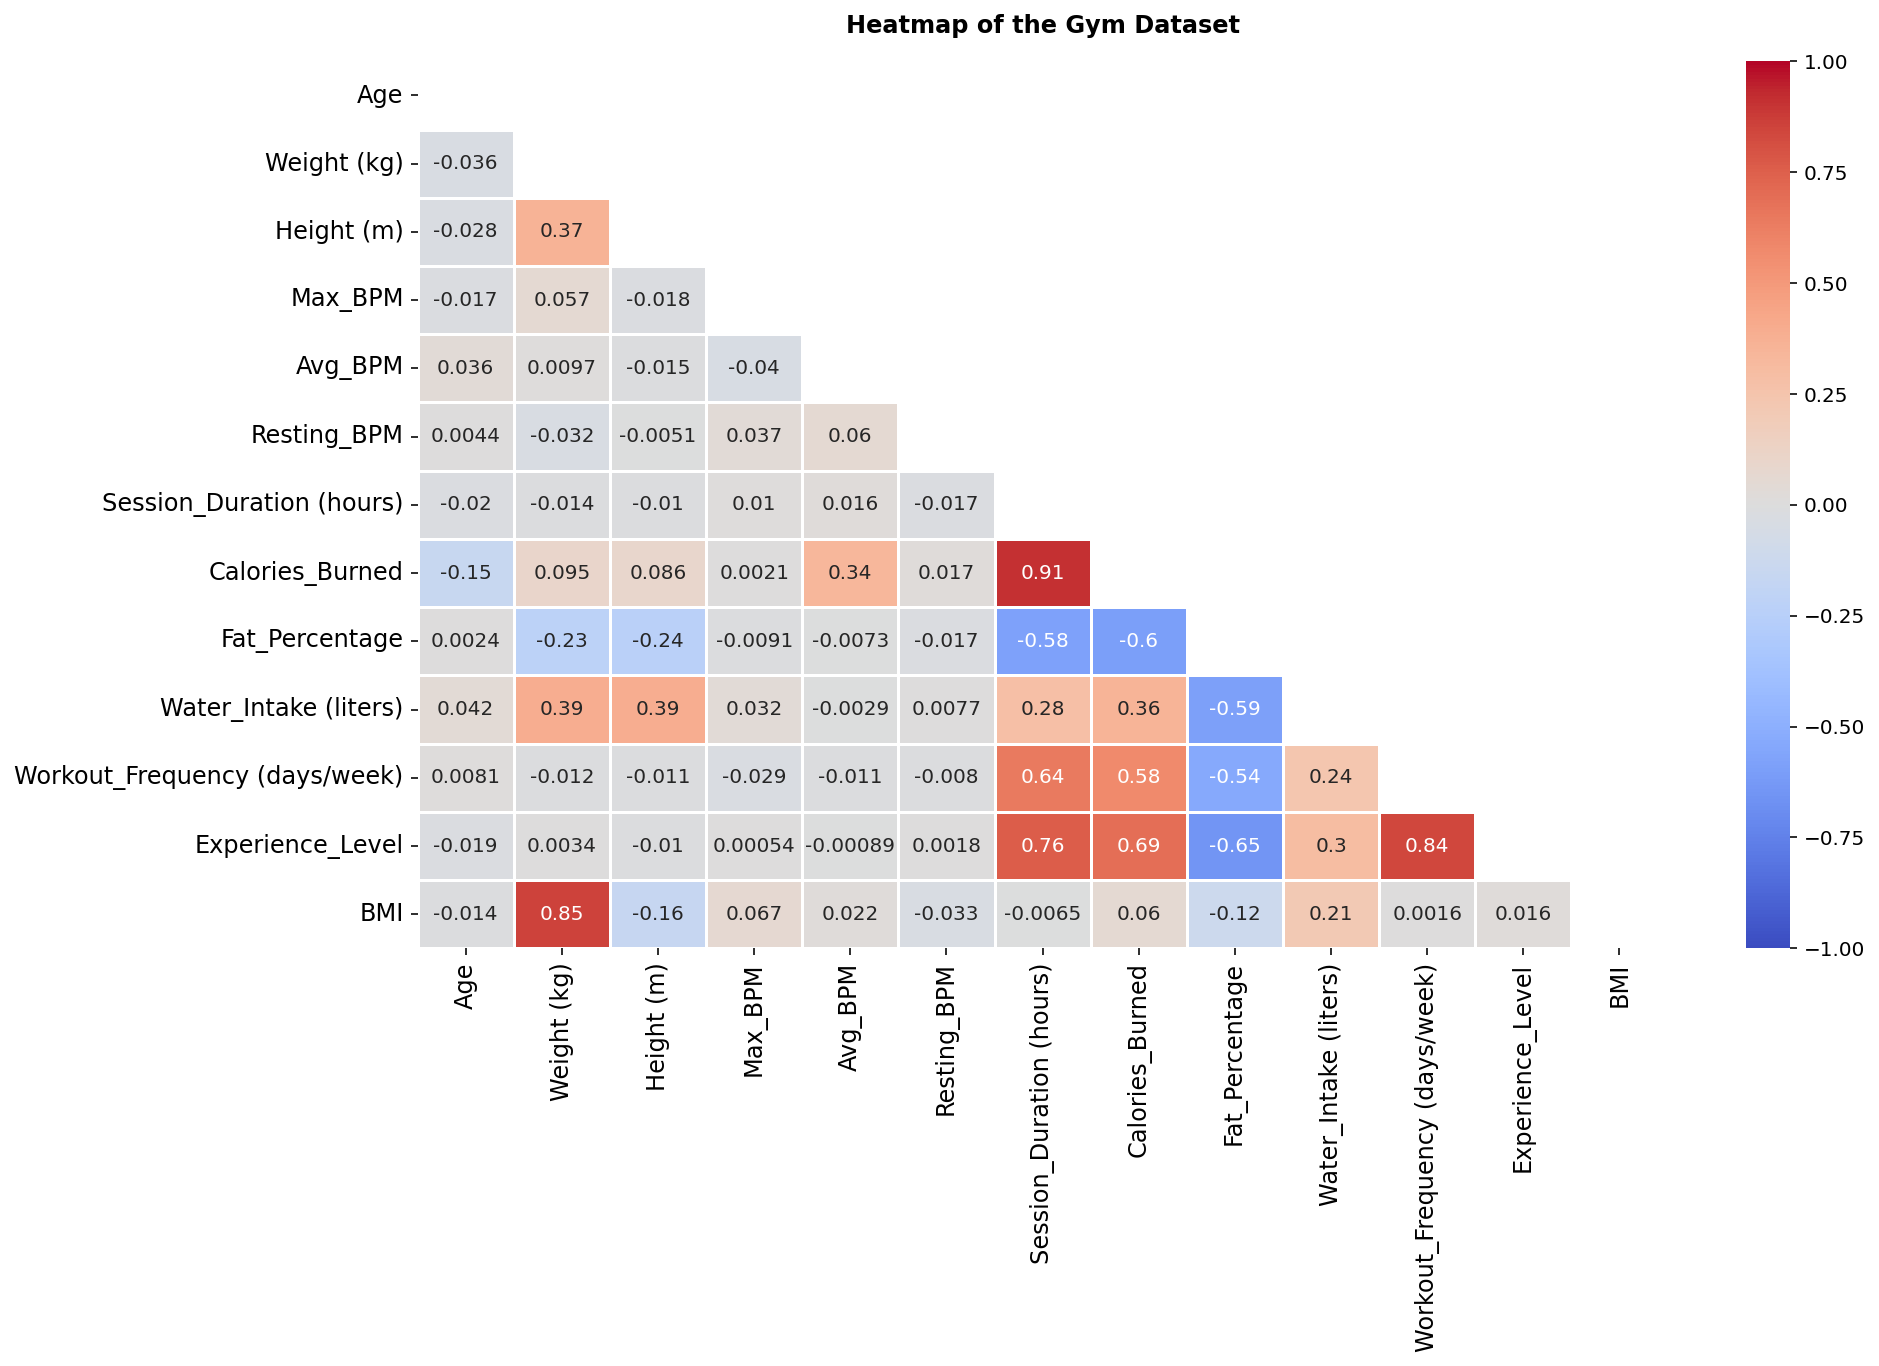

In [13]:
# Call the heatmap function to plot the heatmap
plot_corr_hmap(df_gym_corr)

In [14]:
# Get the total calories burned by each workout type
total_calories = df_gym.groupby('Workout_Type')['Calories_Burned'].sum()


# Print out the avg_calories indexed by the workout type
total_calories

Workout_Type
Cardio      225551.0
HIIT        204603.0
Strength    234960.0
Yoga        215862.0
Name: Calories_Burned, dtype: float64

In [15]:
def plot_pie():
    '''
    Plot the pie chart of the total calories burned by different workout type
    '''
    fig, ax = plt.subplots(dpi=144)
    plt.pie(total_calories, labels=total_calories.index, autopct='%1.1f%%', startangle=90)
    
    # Set pie chart attributes 
    plt.axis('Equal')
    plt.title('% of Total Calories Burned per Workout Type', pad=24)
    
    plt.show()
    return

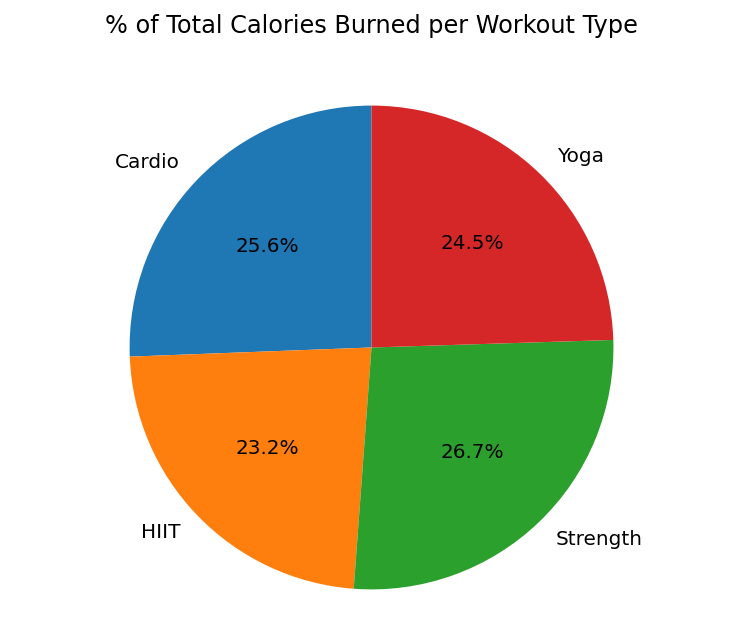

In [16]:
# Display the pie chart using the function defined
plot_pie()